## PythonのAutoFeatを使った自動特徴量エンジニアリング （Automatic Feature Engineering）その1（回帰問題）

url: https://www.salesanalytics.co.jp/datascience/datascience027/

    第232話｜3タイプの特徴量エンジニアリング（feature engineering）基礎テクニック

url: https://www.salesanalytics.co.jp/column/no00232/#Wrapper_Method

    数理モデルを作る上で特徴量エンジニアリング（Feature Engineering）は地味に重要です。

    例えば、より精度の高い予測モデルを構築したいのであれば、アルゴリズムのパラメータチューニングとともに特徴量エンジニアリング（Feature Engineering）に注力したほうがいいでしょう。

    より高精度な予測モデルを作るためのAutoML（自動機械学習）を実現するツールは、最近増えてきました。アルゴリズムのパラメータチューニングなどをしてくれます。

    同様に、特徴量エンジニアリング（Feature Engineering）もある程度自動化できないだろうか、と考えるのは自然の流れです。

    Pythonに幾つかの自動特徴量エンジニアリング（Automatic Feature Engineering）のためのパッケージがあります。

    その中の1つに「AutoFeat」というものがあります。回帰問題と分類問題で利用できます。

    今回は、AutoFeatを使った「回帰問題」での使用方法や手順などを簡単に説明します。

## AutoFeatとは？
    AutoFeatは非常に簡単に使えます。

    ただ、完全な特徴量エンジニアリング（Feature Engineering）を実施してくれるわけではありません。

    例えば、欠測値補完や異常値処理、正規化処理などは実施しません。

    何をやるかと言うと……

    ・先ず、様々な変数変換などを実施し特徴量生成
    ・その後、特徴量選択（Feature Selection）を実施
    ……という感じです。

    要は、AutoFeatを使う前に、ある程度データセットを綺麗に整えておく必要があります。

    詳細は以下を参考にして頂ければと思います。

    The autofeat Python Library for Automated Feature Engineering and Selection
    https://arxiv.org/pdf/1901.07329.pdf

    AutoFeat
    https://github.com/cod3licious/autofeat

## AutoFeatのインストール
    通常のPythonのインストールで行けます。

    以下、コードです。

In [1]:
pip install autofeat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 4.6 MB/s eta 0:00:00


## 数理モデルのアルゴリズム
    AutoFeatの回帰問題に対するアルゴリズムは、LassoLars回帰です。Lasso回帰（ラッソ回帰）の仲間です。

    Lasso回帰（ラッソ回帰）を実施すると結果的に特徴量選択（係数が0）がなされますが、
    そこにLARS(Least Angle Regression)という特徴量選択で使われるアルゴリズムも組み合わせた、非常に面白い線形回帰モデルです。

    LassoLars回帰は、Lasso回帰（ラッソ回帰）と同様に、予測精度にあまり寄与しない特徴量を問答無用で切り捨てていきます。
    実務的に重要であるとか、必ず考慮すべきものとか、どういうことは一切無視です。
    そのため、特徴量選定された後に、特徴量の入れ替えなどをした方がいいかもしれません。

    ちなみに、AutoFeatのLassoLars回帰はScikit-Learn（sklearn）のものを使っています。

## 利用するデータセット
    今回はscikit-learnから提供されているカリフォルニアの住宅価格データセットを使います。

    目的変数は、カリフォルニアの予測したい区画ごとの住宅価格の中央値です。

    特徴量は、以下の8つです。

    MedInc：予測したい区画の収入の中央値
    HouseAge：予測したい区画の築年数
    AveRoom：予測したい区画の家の部屋数の平均値
    AveBedrms：予測したい区画の寝室の平均値
    Population：予測したい区画の人口
    AveOccup：予測したい区画の平均入居率
    Latitude：予測したい区画の緯度
    Longitude：予測したい区画の経度

## 構築するモデル
    今回は、5つのモデルを構築してみます。



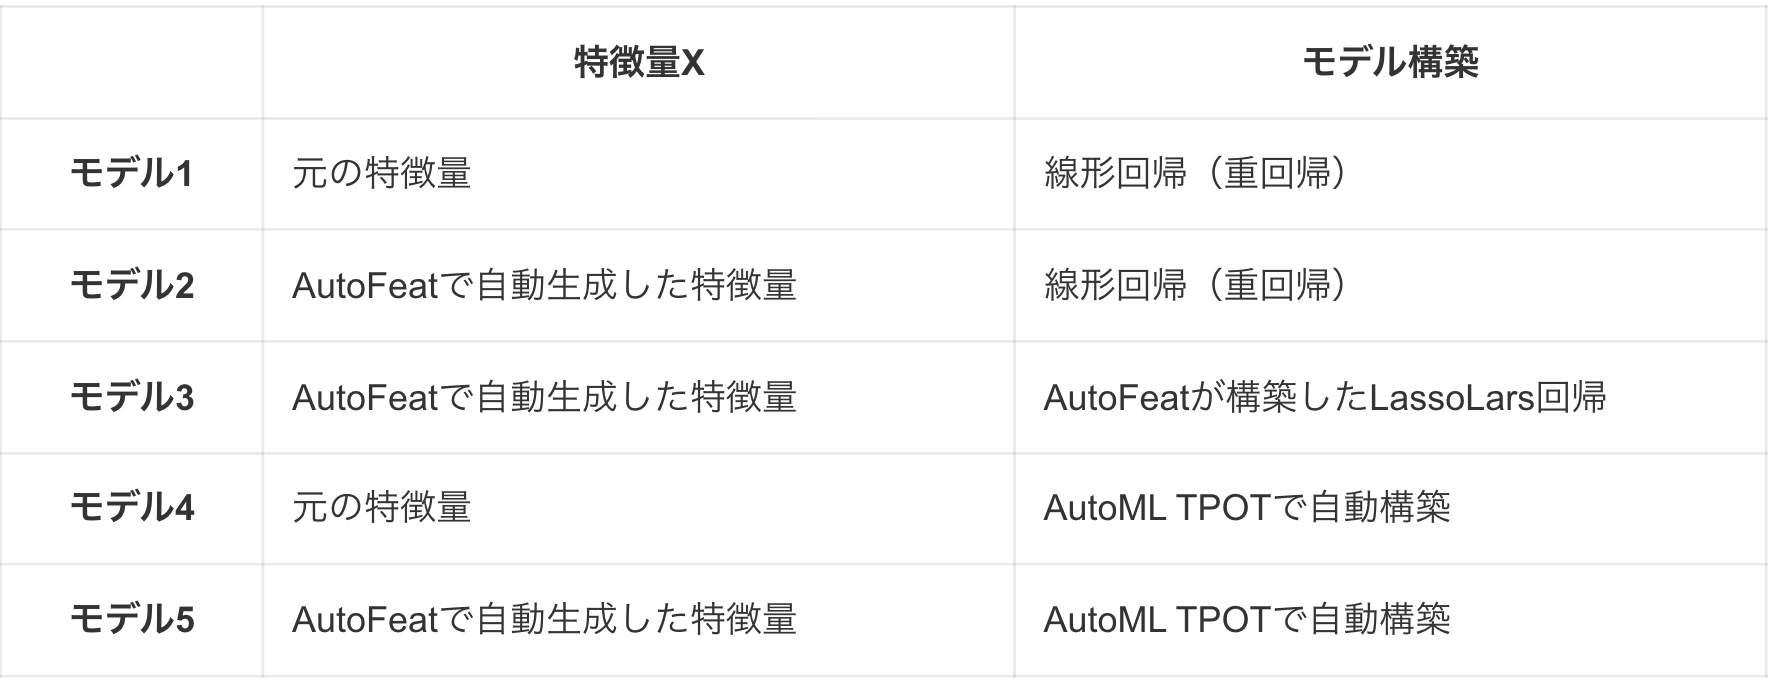

    ちなみに、AutoML（自動機械学習）TPOTは、単により最適な予測モデルを自動構築するだけでなく、パイプライン全体を最適化するので、
    特徴量エンジニアリング（Feature Engineering）を一部自動化しています。

    AutoML（自動機械学習）やTPOTに関しては、以下を参考にして頂ければと思います。インストールの方法から使い方まで解説しています。

    url: https://www.salesanalytics.co.jp/automl/

## モデル1から3を構築し検証する
    次の3つのモデルを学習データで構築し、構築したモデルをテストデータで精度検証（R2：決定係数）します。

    モデル1：元の特徴量を使った線形回帰（重回帰）モデル
    モデル2：AutoFeatで自動生成した特徴量を使った線形回帰（重回帰）モデル
    モデル3：AutoFeatが自動構築したLassoLars回帰モデル

    先ず、必要なライブラリーを読み込みます。

    以下、コードです。

In [2]:
# ライブラリーの読み込み
import pandas as pd
from autofeat import AutoFeatRegressor                 #AutoFeat
from sklearn.model_selection import train_test_split   #データセットの分割（学習データとテストデータ）
from sklearn.datasets import fetch_california_housing  #サンプルデータ
from sklearn.linear_model import LinearRegression      #線形モデル
from sklearn.metrics import r2_score                   #精度評価で利用（R2:決定係数）

    次に、データセットを読み込みます。

    以下、コードです。

In [3]:
# データセットの読み込み
california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data   #特徴量
y = california_housing.target #目的変数

In [4]:
display(X)
display(y)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

    データセットを、学習データとテストデータに分割します。

    以下、コードです。

In [5]:
# データセットの分割（学習データとテストデータ）
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=42)

    学習データ
    特徴量：X_train
    目的変数：y_train
    
    テストデータ
    特徴量：X_test
    目的変数：y_test

    AutoFeatの特徴量エンジニアリングのモデルを定義します。

    以下、コードです。

In [6]:
# 特徴量生成モデル定義
model = AutoFeatRegressor(verbose=1)

    今回は回帰問題なので「AutoFeatRegressor」です。

    実行経過を表示させるverboseはデフォルトでは「0」（表示しない）ですが、
    ここでは簡易的な表示をさせるために「1」にしています。これらは何も設定しないとデフォルトの状態で実行されます。

    では、自動特徴量エンジニアリング（Automatic Feature Engineering）を実行します。

    以下、コードです。

In [9]:
# 特徴量生成（学習データ利用）
X_train_feature_creation = model.fit_transform(X_train, y_train)

[featsel] Scaling data...done.


    自動生成した特徴量は、X_train_feature_creationに格納しています。確認してみます。

    以下、コードです。

In [ ]:
X_train_feature_creation #確認用

    どのような特徴量が自動生成されたのかが分かると思います。

    一覧で出してみます。

    以下、コードです。

In [11]:
X_train_feature_creation.columns #生成された特徴量X

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedInc**5', 'HouseAge/AveOccup',
       'log(MedInc)/AveOccup', 'Longitude**3/Latitude',
       'HouseAge**3*Population', 'AveBedrms**2*MedInc**3',
       'MedInc**2*log(AveOccup)', '1/(HouseAge*Population)',
       'log(Population)/AveBedrms', 'sqrt(Population)/AveOccup',
       'sqrt(HouseAge)*Latitude**3', 'sqrt(HouseAge)*log(AveRooms)',
       'Population/MedInc', 'AveRooms/AveBedrms', 'HouseAge*MedInc**3',
       '1/(AveOccup*MedInc)', 'AveOccup/Population', 'sqrt(HouseAge)*MedInc',
       'log(AveBedrms)/MedInc', '1/(AveBedrms*AveOccup)',
       'HouseAge**2/Population', '1/(AveBedrms*Latitude)',
       'Population**2/AveOccup', 'log(AveRooms)/AveRooms',
       'Latitude**3*log(MedInc)', 'HouseAge*log(AveBedrms)',
       'MedInc*sqrt(Population)', 'AveRooms*sqrt(Population)',
       'log(AveOccup)*log(MedInc)', 'sqrt(Population)/HouseAge',
       'sqrt(AveRooms)*Latitu

    数を確認してみます。

    以下、コードです。

In [12]:
print("number of features in X_train:",  #元の特徴量Xの数
      X_train.shape[1])
print("number of features in X_train_feature_creation:",
      X_train_feature_creation.shape[1]) #新しい特徴量Xの数

# 元の特徴量は8個でしたが、AutoFeatによる特徴量の自動生成で63個の特徴量が新たに追加され、結果的に71個の特徴量になりました。

number of features in X_train: 8
number of features in X_train_feature_creation: 57


    この自動生成した特徴量と同じ特徴量のテストデータを作ります。X_test_feature_creationに格納します。

In [13]:
# テストデータの特徴量生成
X_test_feature_creation = model.transform(X_test)

    元の特徴量のデータセット（X_trainとy_train）と新たな特徴量のデータセット（X_train_feature_creationとy_train）で、線形回帰（重回帰）モデルを構築してみます。

    以下、コードです。

In [14]:
# モデル構築
model_1 = LinearRegression().fit(X_train,y_train)
model_2 = LinearRegression().fit(X_train_feature_creation, y_train)

    LassoLars回帰モデルは、AutoFeatによる特徴量の自動生成時に構築されています。学習されたモデルは「model」にあります。

    では、テストデータを使いそれぞれのモデルの精度（R2：決定係数）を比較してみたいと思います。

    以下、コードです。

In [15]:
# 評価（R2）
print("model_1   R^2: %.4f" % r2_score(y_test, model_1.predict(X_test)) )
print("model_2   R^2: %.4f" % r2_score(y_test, model_2.predict(X_test_feature_creation)))
print("LassoLars R^2: %.4f" % r2_score(y_test, model.predict(X_test_feature_creation)))

model_1   R^2: 0.5958
model_2   R^2: 0.6868
LassoLars R^2: 0.6686


    当然ですが、最も精度が悪いのは、一番の上（model_1）の「モデル1：元の特徴量を使った線形回帰（重回帰）モデル」です。R2（決定係数）は59.58%です。

    特徴量の自動生成の成果はどうでしょうか？

    真ん中（model_2）の「モデル2：AutoFeatで自動生成した特徴量を使った線形回帰（重回帰）モデル」が最も精度が高く、R2（決定係数）は71.63%です。

    一番下（model）の「モデル3：AutoFeatが自動構築したLassoLars回帰モデル」も悪くはなく、R2（決定係数）は67.14%です。

## AutoML（自動機械学習）TPOTでモデル構築（モデル4と5）
    おまけの意味合いが強いですが、次の2つのモデルを学習データで構築し、構築したモデルをテストデータで精度検証（R2：決定係数）します。

    モデル4：元の特徴量を使いAutoML（自動機械学習）TPOTで自動構築したモデル
    モデル5：AutoFeatで自動生成した特徴量を使ってAutoML（自動機械学習）TPOTで自動構築したモデル
    どうなるでしょうか？

    先ず、モデル4です。元の特徴量を使いモデルを自動構築します。

    以下、コードです。

In [17]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=5b603467bdf12209067355a41e9127ca9d813959ff47e6d7997131499cd668b3
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [18]:
# 必要なライブラリの読み込み
from tpot import TPOTRegressor

# TPOTRegressorの設定
tpot = TPOTRegressor(scoring='r2',
                     generations=5,
                     population_size=25,
                     random_state=42,
                     verbosity=2,
                     n_jobs=-1)

# モデル構築
tpot.fit(X_train, y_train)

# 評価（R2）
r2_score(y_test, tpot.predict(X_test))

# 一番下にR2（決定係数）があります。83.70%です。かなりいいですね。

Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8229240103680615

Generation 2 - Current best internal CV score: 0.8237580459549264

Generation 3 - Current best internal CV score: 0.8242943114019624

Generation 4 - Current best internal CV score: 0.8269519524389224

Generation 5 - Current best internal CV score: 0.8269519524389224

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.99, learning_rate=0.1, loss=huber, max_depth=8, max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=9, n_estimators=100, subsample=0.8500000000000001)


0.8336415178631201

    次に、モデル5です。AutoFeatで自動生成した特徴量を使ってモデルを自動構築します。

    以下、コードです。非常に時間がかかりますの、ご注意ください。

In [ ]:
# TPOTRegressorの設定
tpot2 = TPOTRegressor(scoring='r2',
                      generations=5,
                      population_size=25,
                      random_state=42,
                      verbosity=2,
                      n_jobs=-1)

# モデル構築
tpot2.fit(X_train_feature_creation, y_train)

# 評価（R2）
r2_score(y_test, tpot2.predict(X_test_feature_creation))

# 一番下にR2（決定係数）があります。81.84%です。

Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]

    正直、AutoML（自動機械学習）TPOTでモデル構築するなら、事前に特徴量を自動生成しなくてもよさそうですね（断言はできませんが……）。

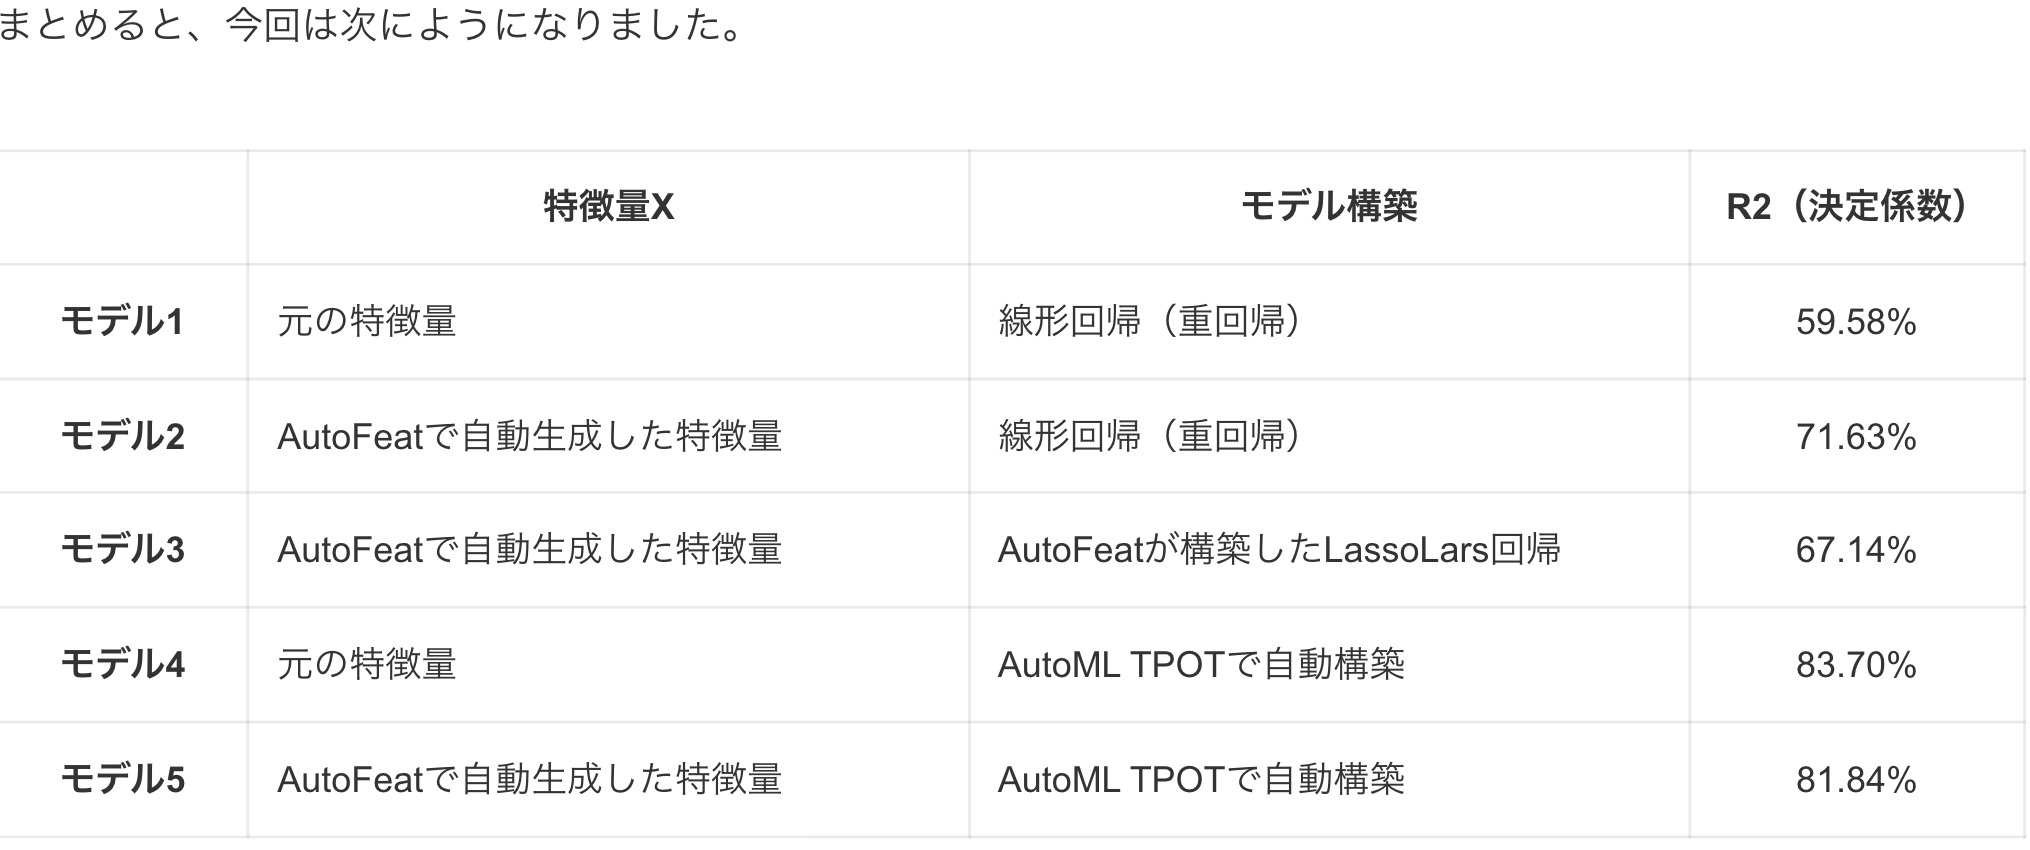

## 次回
    今回は、回帰問題でした。次回は、分類問題です。